# 09-2 순환 신경망으로 IMDB 리뷰 분류하기

## IMDB 리뷰 데이터셋

### 케라스로 IMDB 데이터 불러오기

In [1]:
# imdb 모듈을 임포트하여 데이터를 적재한 후, 가장 자주 등장하는 단어 500개만 사용하도록 num_words 매개변수를 지정
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
# 훈련 세트와 테스트 세트의 크기를 확인
# 각각 25000개의 1차원 배열 샘플
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
# 첫 번째 리뷰에 담긴 내용을 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [4]:
# 타깃값이 0(부정)과 1(긍정)으로 나누어짐 (이진 분류 문제)
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


### 훈련 세트 준비하기

In [5]:
# 훈련 세트에서 20%를 검증 세트로 떼어 놓음
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [6]:
# 훈련 세트에 대해 각 리뷰의 길이를 계산해 넘파이 배열에 담은 후,
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [7]:
# 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하도록 함
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


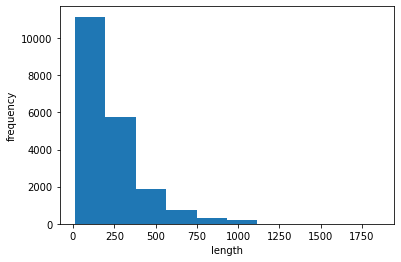

In [8]:
# 리뷰의 길이를 히스토그램으로 표현
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

### 시퀀스 패딩

In [9]:
# 케라스는 시퀀스 데이터의 길이를 맞추는 pad_sequences() 함수를 제공하므로 maxlen에 원하는 길이인 100을 지정
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [11]:
# (20000, 100) 크기의 2차원 배열
print(train_seq.shape)

(20000, 100)


In [12]:
# 첫 번째 샘플을 출력
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [13]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [14]:
# 여섯 번째 샘플을 출력
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [15]:
# 검증 세트의 길이도 100으로 맞춤
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

### 순환 신경망 모델 만들기

In [16]:
from tensorflow import keras
model = keras.Sequential() 
# 순환 신경망
# 사용할 뉴런의 개수 8개, 입력 차원 (100, 500)
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

### 원-핫 인코딩

In [17]:
# 원-핫 인코딩 유틸리티 사용
train_oh = keras.utils.to_categorical(train_seq)

In [18]:
# 정수 하나마다 모두 500차원의 배열로 변경되었기 때문에 (20000, 100, 500) 크기로 변환됨
print(train_oh.shape)

(20000, 100, 500)


In [19]:
# 첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩되었는지 확인
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
# 나머지 원소를 모두 더하면 1이므로 
# 열한 번째 원소만 1이고 나머지는 모두 0이어서 원-핫 인코딩이 잘된 것을 볼 수 있음
print(np.sum(train_oh[0][0]))

1.0


In [21]:
# 같은 방식으로 val_seq도 원-핫 인코딩으로 변환
val_oh = keras.utils.to_categorical(val_seq)

### 모델 구조 확인

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기

### 모델 훈련

In [23]:
# RMSprop 객체를 만들어 학습률을 0.0001로 지정하고 에포크 횟수를 100으로 늘리고 배치 크기는 64개로 설정
# 그 밖에 체크포인트와 조기 종료를 구성하는 코드를 작성하여 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 78ms/step - loss: 0.7001 - accuracy: 0.5005 - val_loss: 0.6937 - val_accuracy: 0.5246
Epoch 2/100
313/313 [==============================] - 24s 75ms/step - loss: 0.6917 - accuracy: 0.5279 - val_loss: 0.6845 - val_accuracy: 0.5640
Epoch 3/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6809 - accuracy: 0.5710 - val_loss: 0.6763 - val_accuracy: 0.5870
Epoch 4/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6710 - accuracy: 0.5996 - val_loss: 0.6675 - val_accuracy: 0.6056
Epoch 5/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6582 - accuracy: 0.6237 - val_loss: 0.6524 - val_accuracy: 0.6328
Epoch 6/100
313/313 [==============================] - 23s 74ms/step - loss: 0.6416 - accuracy: 0.6521 - val_loss: 0.6372 - val_accuracy: 0.6556
Epoch 7/100
313/313 [==============================] - 23s 73ms/step - loss: 0.6219 - accuracy: 0.6763 - val_loss: 0.6178 - val_ac

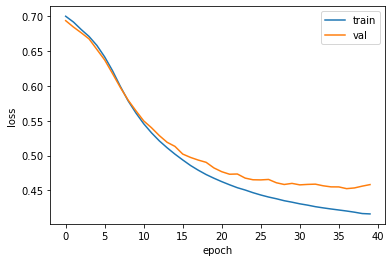

In [24]:
# 훈련 손실와 검증 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 단어 임베딩을 사용하기

### 임베딩

In [25]:
# Embedding 클래스로 임베딩 기능을 제공
# Embedding 클래스의 첫 번째 매개변수는 어휘 사전의 크기이므로 500으로 지정
# 두 번째 매개변수는 임베딩 벡터의 크기이므로 16개의 벡터로 토큰 하나를 출력하도록 16으로 지정
# 세 번째 매개변수는 시퀀스의 길이를 나타내므로 앞서 샘플의 길이를 100으로 맞추어 train_seq를 만들었으므로 100으로 지정
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

# 모델 구조
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 29s 88ms/step - loss: 0.6953 - accuracy: 0.5048 - val_loss: 0.6927 - val_accuracy: 0.5144
Epoch 2/100
313/313 [==============================] - 28s 89ms/step - loss: 0.6886 - accuracy: 0.5378 - val_loss: 0.6848 - val_accuracy: 0.5584
Epoch 3/100
313/313 [==============================] - 28s 89ms/step - loss: 0.6698 - accuracy: 0.6383 - val_loss: 0.6629 - val_accuracy: 0.6578
Epoch 4/100
313/313 [==============================] - 27s 88ms/step - loss: 0.6498 - accuracy: 0.7005 - val_loss: 0.6455 - val_accuracy: 0.7108
Epoch 5/100
313/313 [==============================] - 28s 90ms/step - loss: 0.6332 - accuracy: 0.7302 - val_loss: 0.6313 - val_accuracy: 0.7232
Epoch 6/100
313/313 [==============================] - 27s 88ms/step - loss: 0.6185 - accuracy: 0.7429 - val_loss: 0.6275 - val_accuracy: 0.7158
Epoch 7/100
313/313 [==============================] - 27s 88ms/step - loss: 0.6052 - accuracy: 0.7531 - val_loss: 0.6065 - val_ac

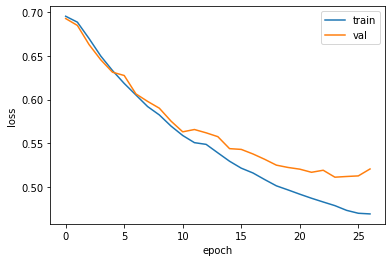

In [27]:
# # 훈련 손실와 검증 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()